## Imports and Setup

In [1]:
# autoreload magic
%load_ext autoreload
%autoreload 2

In [75]:
from pathlib import Path
import colorcet as cc
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

from datasets import load_dataset, Dataset, load_from_disk

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# set some defaults
warnings.filterwarnings("ignore")
np.set_printoptions(precision=3, 
                    floatmode="fixed")
pd.set_option("display.precision", 3)

# set default font size for matplotlib
plt.rcParams.update({"font.size": 10})
# set default font
plt.rcParams["font.family"] = "Times"

heatmap_parms = {
                # "linewidths" : 0.5,
                "linecolor" : "white",
                "cmap" : cc.cm.bkr,
                }




## Actions

In [76]:
from project_modules.utils import check_gpu
device = check_gpu()

### Load Data

In [77]:
# make synthetic data with sklearn
from sklearn.datasets import make_classification

# make synthetic data with sklearn
from sklearn.datasets import make_classification

dx, dy = make_classification(n_samples=1_000,
                        n_features=20,
                        n_informative=2,
                        n_redundant=0,
                        n_repeated=0,
                        n_classes=3,
                        n_clusters_per_class=1,
                        weights=None,
                        flip_y=0.01,
                        class_sep=5.0,
                        hypercube=True,
                        shift=0.0,
                        scale=None,
                        shuffle=True,
                        random_state=24)

In [78]:
dx.shape, dy.shape

((1000, 20), (1000,))

In [79]:
# scale the data to be between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dx = scaler.fit_transform(dx)


In [80]:
# # which features have the greatest variability?
# from sklearn.feature_selection import VarianceThreshold

# vt = VarianceThreshold()
# vt.fit(dx)

# pd.DataFrame({#"feature" : range(dx.shape[1]),
#                 "variance" : vt.variances_}).sort_values("variance", ascending=False)


In [81]:
X_train, X_test, y_train, y_test = train_test_split(dx, dy, 
                                                    test_size=0.2,
                                                     random_state=42,
                                                     stratify=dy
                                                     )

In [82]:
set(y_train)

{0, 1, 2}

In [83]:
#===============================================================================
# load the data
#===============================================================================

# logger.log("Loading data.")

### Analyse 

In [84]:
#===============================================================================
# analyse the data
#===============================================================================

# console.log("Analysing data.")

In [85]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

### Evaluate    

In [86]:
#===============================================================================
# analyse the data
#===============================================================================

# console.log("Evaluating analysis.")

### Report

In [87]:
#===============================================================================
# reporting analysis outputs
#===============================================================================

# console.log("Preparing and saving outputs.")

### Save files

In [88]:
#===============================================================================
# # demonstrate targzip save
#===============================================================================
# from project_modules.io import save_tgz
# save_tgz("project_modules", "utils", verbose=True, target_dir = ".")

## Plotting

In [89]:
# from project_modules.viz import plot_heatmap

# # make a square matrix of random numbers
# n = 10
# mat = np.random.rand(n, n)

# mat = dx

# # make a correlation matrix of mat
# mm = np.corrcoef(mat)

# # make a list of n random labels
# labels = [f"Label {i}" for i in range(len(mat))]

# # plot the matrix
# fig1 = plot_heatmap(mat, line1 = "Random Items TEST", labels = labels)
# fig2 = plot_heatmap(mm, line1 = "Correlation of Random Items TEST", labels = labels)

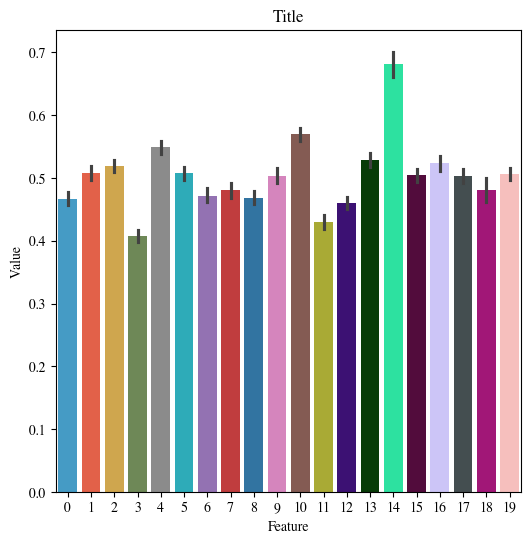

In [90]:
# make a dataframe of random numbers
df = pd.DataFrame(X_train)

from project_modules.viz import plot_bar, plot_histogram, plot_scatter

fig1 = plot_bar(df, "Title", xlabel = "Feature", ylabel = "Value")


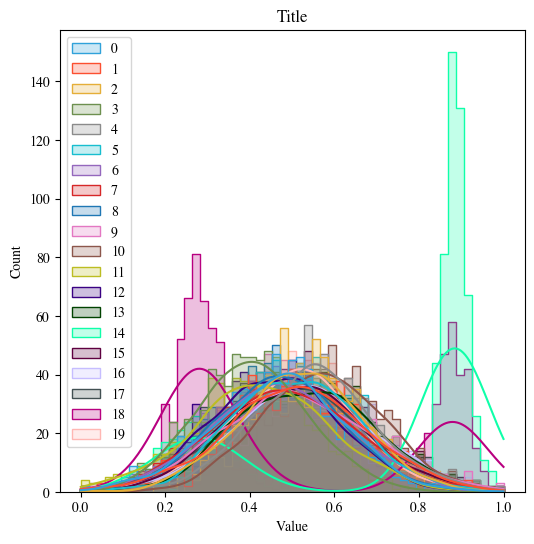

In [91]:
fig2 = plot_histogram(df, "Title", xlabel = "Value", ylabel = "Count")

<class 'list'>


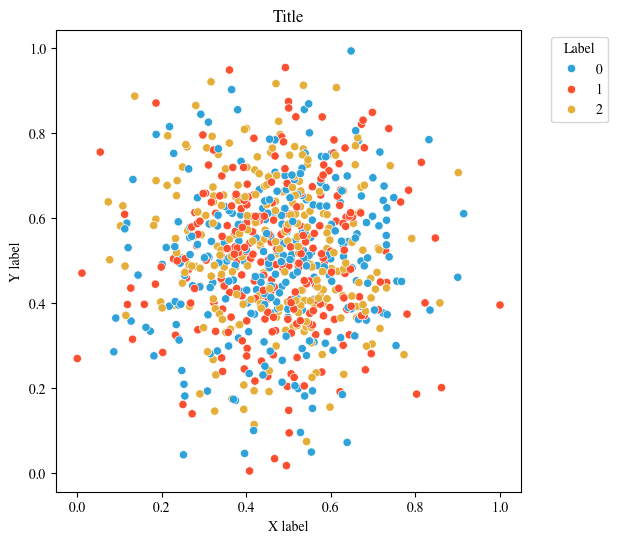

In [92]:
fig3 = plot_scatter(df, "Title", hue_variable = pd.Series(y_train, name = "Label"))

>>> [umap] ... reducing
>>> [umap] ... clustering
[[0.045 0.551 0.048]
 [0.020 0.027 0.542]
 [0.931 0.005 0.005]
 [0.036 0.041 0.572]
 [0.025 0.603 0.029]]


<Axes: xlabel='x', ylabel='y'>

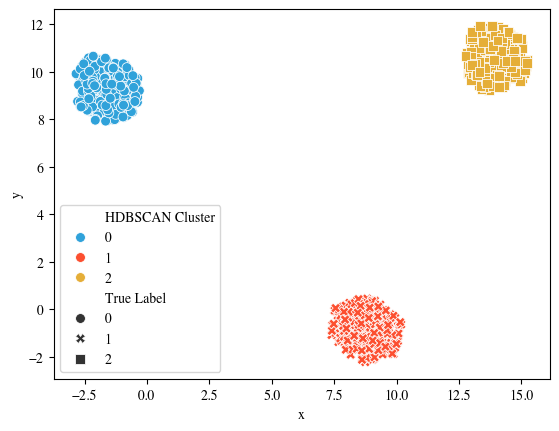

In [106]:
from project_modules.clustering import prep_umap, plot_umap
import seaborn as sns
import colorcet as cc

r, c_vec, c_id = prep_umap(X_train, y = None)

df = pd.DataFrame(r, columns = ["x", "y"])
df["HDBSCAN Cluster"] = c_id
df["True Label"] = y_train
df["cvec"] = c_vec

palette = cc.glasbey_hv
sns.scatterplot(
                    data    = df, 
                    x       = "x", 
                    y       = "y", 
                    hue     = "HDBSCAN Cluster", 
                    palette = palette,
                    style   = "True Label", 
                    markers = ["o", "X", "s"], 
                    s       = 50
                )

In [107]:
# import shap
# explainer = shap.Explainer(rfc)
# shap_values = explainer.shap_values(X_test)
# shap.summary_plot(shap_values[1], X_test)

In [126]:
from project_modules.clustering._umap import _cluster, _reduce
# cvec, cid = _cluster(X_train)

rr = _reduce(X_train)
cvec, cid = _cluster(rr)

cvec = np.array(cvec)

df = pd.DataFrame(cvec, columns = [f"DIM{i+1}" for i in range(cvec.shape[1])])
df["HDBSCAN Cluster"] = cid
df["True Label"] = y_train


[[0.045 0.551 0.048]
 [0.020 0.027 0.542]
 [0.931 0.005 0.005]
 [0.036 0.041 0.572]
 [0.025 0.603 0.029]]


<Axes: xlabel='DIM1', ylabel='DIM3'>

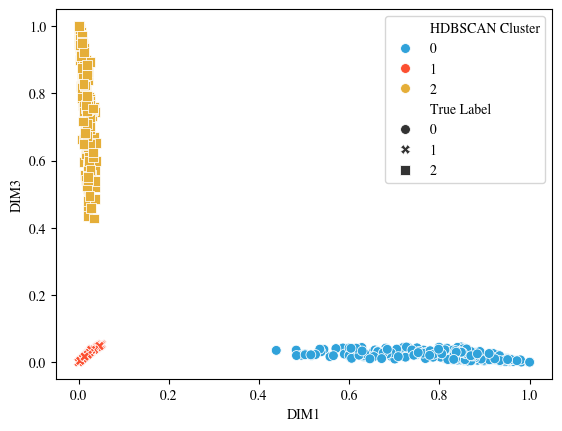

In [127]:
sns.scatterplot(
                    data    = df, 
                    x       = "DIM1", 
                    y       = "DIM3", 
                    hue     = "HDBSCAN Cluster", 
                    palette = palette,
                    style   = "True Label", 
                    markers = ["o", "X", "s"], 
                    s       = 50
                )